In [12]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,SoftmaxWeight,LocationScaleFlow
from models import EMDensityEstimator
from targets import Target, Uniform
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


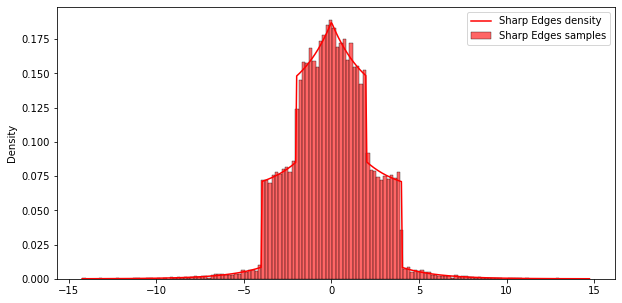

In [13]:
example = "Sharp Edges"
num_samples = 30000
target = Target(example, num_samples)
target.target_visual(num_samples = 30000)
p, target_log_density, target_samples = target.get_target()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 15.01it/s, loss = 2.167351722717285]


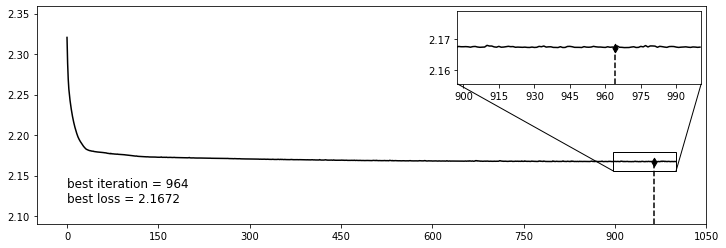

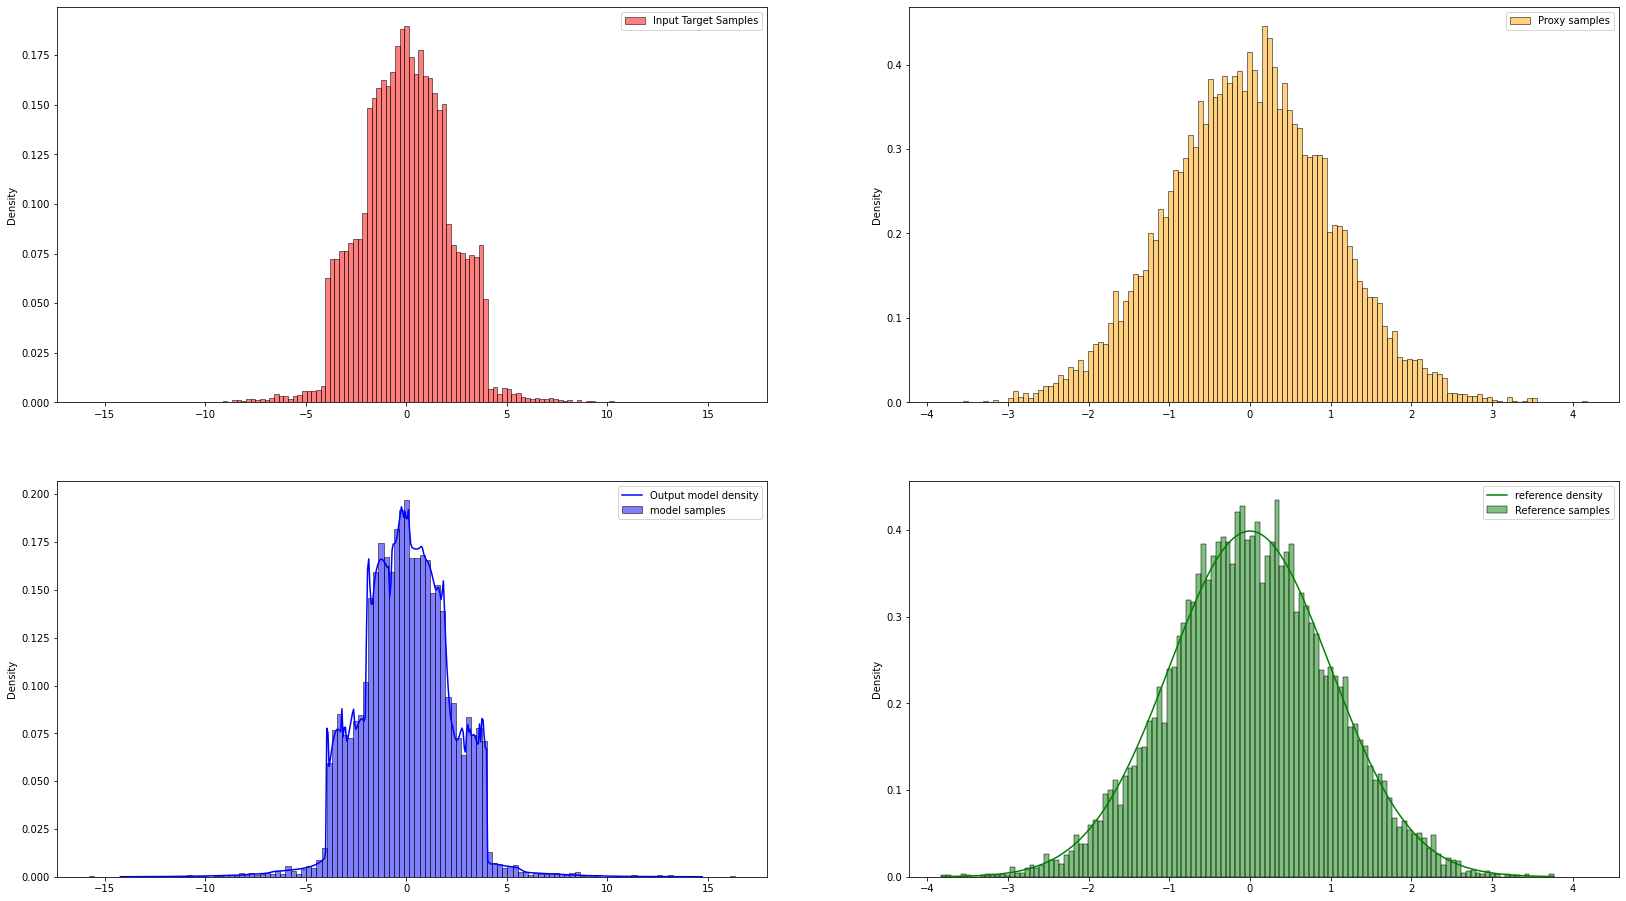

In [17]:
w = SoftmaxWeight(10, p, [4,4,4], mode = 'NN')
dif = DIFDensityEstimator(target_samples, 10, initial_w= w)
dif.train(1000,3000, visual = True)
dif.model_visual(num_samples = 10000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:18<00:00, 71.96it/s, loss = 2.175603151321411]


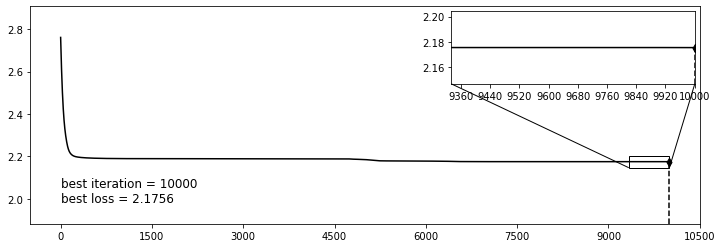

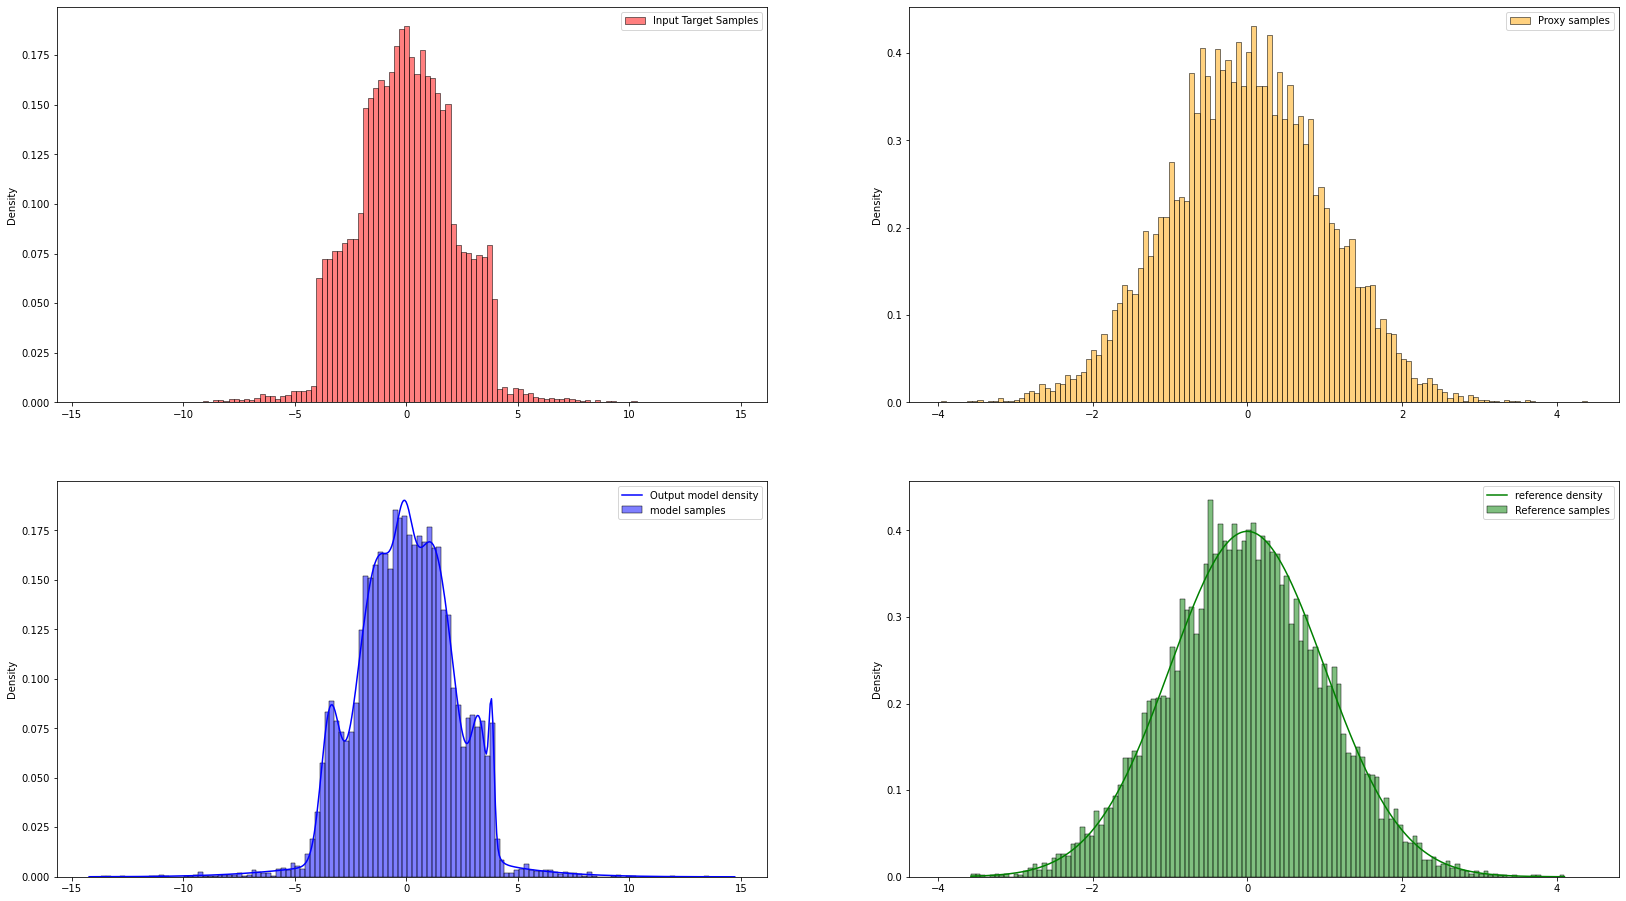

In [18]:
w = SoftmaxWeight(10, p, [5,5,5], mode = 'Constant')
dif = DIFDensityEstimator(target_samples, 10, initial_w= w)
dif.train(10000, visual = True)
dif.model_visual(num_samples = 10000)